In [1]:
!which python

/Users/saiha/opt/anaconda3/envs/mnist-neural/bin/python


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Imports

In [3]:
#Standard Imports
import os

# Third-Party Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Local Impoprts

In [4]:
# Plotting configurations
sns.set()

# Load Data

In [5]:
df_train=pd.read_csv("digit-recognizer/train.csv")

In [6]:
df_test =pd.read_csv("digit-recognizer/test.csv")

In [7]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_train.iloc[0]

label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64

In [10]:
df_train.iloc[0].values

array([  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [11]:
X_train=df_train.drop(columns="label")
Y_train=df_train["label"]

## Plot the data

In [12]:
X_train.iloc[0].values.shape

(784,)

In [13]:
np.sqrt(784)

28.0

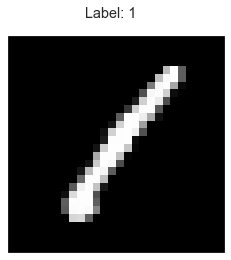

In [14]:
plt.imshow(X_train.iloc[0].values.reshape(28,28),cmap="gray")
plt.suptitle(f"Label: {Y_train.iloc[0]}")
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [15]:
def plot_image(pixel_row,label):
    plt.imshow(pixel_row.reshape(28,28),cmap="gray")
    plt.suptitle(f"Label: {label}")
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.show()

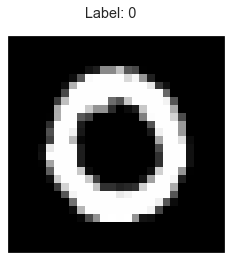

In [16]:
plot_image(X_train.iloc[1].values,Y_train.iloc[1])

In [17]:
def plot_ten_images_for_each_Class(X_train,Y_train):
    fig, axs = plt.subplots(10,10,figsize=(10,10))
    for val in range(10):
        images = X_train[Y_train == val].iloc[:10].values
        for i, image in enumerate(images):
            axs[val,i].imshow(image.reshape(28,28), cmap ="gray")
            axs[val,i].grid(False)
            axs[val,i].set_xticks([])
            axs[val,i].set_yticks([])
    plt.show()

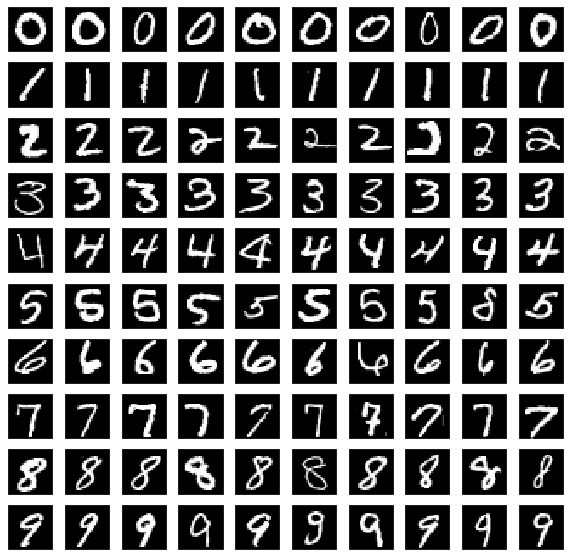

In [18]:
plot_ten_images_for_each_Class(X_train,Y_train)

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.25)

In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train,y_train)

/Users/saiha/opt/anaconda3/envs/mnist-neural/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Logistic Regression Model Accuracy

In [23]:
model.score(X_val,y_val)

0.916

# Getting Intuition around Neural Network
https://playground.tensorflow.org/

In [24]:
import tensorflow as tf

In [25]:
# Specify the neural network model architecture,
#taking care to ensure that input and output match the data
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])



In [26]:
# Now, we specify how we want tensorflow to train our model.
#Specifically, what are our loss, optimizer, and evaluation metrics?
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)


In [36]:
# This is where we actually fit the model and figure out what is 
#the best weights to give accurate predictions

history=model.fit(
    x=X_train.values,
    y=y_train.values,
    epochs=6,
    validation_split=0.25,
)

Epoch 1/6
739/739 [==============================] - 1s 2ms/step - loss: 0.1724 - accuracy: 0.9556 - val_loss: 0.5756 - val_accuracy: 0.9308
Epoch 2/6
739/739 [==============================] - 1s 2ms/step - loss: 0.1652 - accuracy: 0.9577 - val_loss: 0.3734 - val_accuracy: 0.9392
Epoch 3/6
739/739 [==============================] - 1s 2ms/step - loss: 0.1730 - accuracy: 0.9603 - val_loss: 0.3590 - val_accuracy: 0.9425
Epoch 4/6
739/739 [==============================] - 2s 3ms/step - loss: 0.1477 - accuracy: 0.9652 - val_loss: 0.3764 - val_accuracy: 0.9463
Epoch 5/6
739/739 [==============================] - 1s 2ms/step - loss: 0.1502 - accuracy: 0.9645 - val_loss: 0.4023 - val_accuracy: 0.9449
Epoch 6/6
739/739 [==============================] - 1s 2ms/step - loss: 0.1610 - accuracy: 0.9644 - val_loss: 0.3946 - val_accuracy: 0.9441


Accuracy on 6th epoch 92.23%

In [30]:
history

!which python
%load_ext autoreload
%autoreload 2
%matplotlib inline
#Standard Imports
import os

# Third-Party Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Local Impoprts
# Plotting configurations
sns.set()
df_train=pd.read_csv("digit-recognizer/train.csv")
df_test =pd.read_csv("digit-recognizer/test.csv")
df_train.head()
df_test.head()
df_train.iloc[0]
df_train.iloc[0].values
X_train=df_train.drop(columns="label")
Y_train=df_train["label"]
X_train.iloc[0].values.shape
np.sqrt(784)
plt.imshow(X_train.iloc[0].values.reshape(28,28),cmap="gray")
plt.suptitle(f"Label: {Y_train.iloc[0]}")
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()
def plot_image(pixel_row,label):
    plt.imshow(pixel_row.reshape(28,28),cmap="gray")
    plt.suptitle(f"Label: {label}")
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.show()
plot_image(X_train.iloc[1].values,Y_train.iloc[1])
def plot_ten_images_for_each_Class(X_train,Y_tr

### Plotting Learning Curve for our neural nets

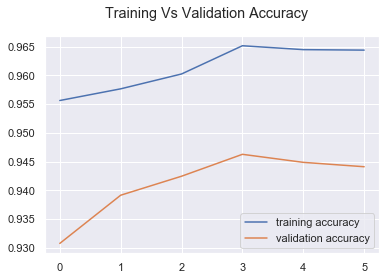

In [42]:
plt.plot(history.history["accuracy"], label="training accuracy")
plt.plot(history.history["val_accuracy"], label= "validation accuracy")
plt.legend()
plt.suptitle("Training Vs Validation Accuracy")
plt.show()